**大 투자시대  Y&Z세대 제대로 투자하고 있는가?**




**<목차>**

**서론 : 파란만장 2020 주식시장**


**본론**

**5W분석**

1. Who Y, Z 세대는 누구인가?

2. When Y, Z세대 언제부터 주식을 시작했는가?

* 코스피의 폭락
* 기존고객 신규고객 분류

3. Where Y, Z세대는 어느 시장에 투자할까?

* 코스피, 코스닥 비교

4. What Y, Z세대는 어떤 주식을 샀을까?

* 3월 1일 기준 포트폴리오 비교
 + 전체세대 포트폴리오 비교
 + Z 세대 포트폴리오 비교 
 + Y 세대 포트폴리오 비교
* 투자성향별 포트폴리오 비교

5. Why Y, Z 세대의 투자 공통점은?
* 구글 트렌드와 거래량 비교

결론
* 개선된 투자문화를 위한 제언
---



## 서론
 연초 코스피지수 2,300선에서 출발하여 3월 코로나 바이러스로 인해 코스피지수 1,439로 바닥을 찍고 12월 현재 2800선을 돌파한 2020년 대한민국의 주식시장은 ‘파란만장'했습니다.

 특히 이른바 동학개미운동이라고 말하는 개인들의 적극적인 매수세로 지수를 회복한 만큼 기존에 외국인과 기관 중심으로 돌아가던 대한민국의 주식시장에서 개인들의 역할이 제고되었다고 볼 수 있습니다. 그 중에서도 앞으로 대한민국 주식시장의 주인공이 될 Y, Z세대들의 주식시장 대거 유입은 지금까지 기성세대들이 형성해온 주식시장과는 또 다른 모습을 보일 것으로 기대됩니다.

 금융시장에 새로운 국면을 가져올 Y, Z 세대의 투자방식을 이해하기 위해 2019년 1월 1일부터 2020년 6월 30일까지 기간의 데이터분석을 통해 Y, Z세대의 투자방식을 살펴보려고합니다. 
 
 먼저 Y, Z세대를 5W(Who, When, Where, What, Why) 분석을 통해 투자 방식을 분석해보고, 투자방식에 대한 간단한 평가와 개선방향을 제시해보겠습니다.


**라이브러리 목록**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

!pip install pyecharts==0.5.11
!pip install squarify
from pyecharts import Pie
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from collections import Counter
import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import squarify as tree
from itertools import chain
from collections import defaultdict

!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath).get_name()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family=font,size = 9)

fm._rebuild()

plt.rcParams['axes.unicode_minus'] = False

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


**데이터 준비 및 전처리**

In [ ]:
path = '/gdrive/My Drive/nh시각화경진대회/'


#고객데이터 전처리, 불러오기
cus_info = pd.read_csv(path+'2_cus_info.csv')
cus_info.columns = ['고객번호','성별','연령대','주소','고객등급','고객투자성향']
cus_info['고객번호'] = cus_info['고객번호'].str.replace(' ','')
cus_info['주소'] = cus_info['주소'].str.replace(' ','')
cus_info['고객등급'] = cus_info['고객등급'].str.replace(' ','')
cus_info['고객투자성향'] = cus_info['고객투자성향'].str.replace(' ','')



#고객계좌 데이터 전처리, 불러오기
act_info = pd.read_csv(path+'2_act_info.csv')
act_info.columns = ['계좌번호','고객번호','계좌개설월']
act_info['계좌번호'] = act_info['계좌번호'].str.replace(' ','')
act_info['고객번호'] = act_info['고객번호'].str.replace(' ','')



#코스피 외부데이터 불러오기,전처리
kospi = pd.read_excel(path+'코스피.xlsx')
kospi['회사명'] = kospi['회사명'].str.strip()
kospi['종목코드'] = list(map(lambda x: str(x).strip().zfill(6),kospi['종목코드']))
kospi.drop(['대표자명','홈페이지','지역'],axis = 1,inplace = True);kospi


#코스닥 외부데이터 불러오기,전처리
kosdaq =pd.read_excel(path+'코스닥.xlsx')
kosdaq['회사명'] = kosdaq['회사명'].str.strip()
kosdaq['종목코드'] = list(map(lambda x: str(x).strip().zfill(6),kosdaq['종목코드']))
kosdaq.drop(['대표자명','홈페이지','지역'],axis = 1,inplace = True);kosdaq




#Z세대 즉 1~24살 고객데이터
cus_info_z = cus_info[(cus_info['연령대']==00) | (cus_info['연령대']==20)]

#Y세대 즉 25~39살 고객데이터
cus_info_y = cus_info[(cus_info['연령대']>24) & (cus_info['연령대']<40)]

#이외 세대(기성세대 고객데이터)
cus_info_else = cus_info[cus_info['연령대']>39]


#종목 데이터(국내 + 해외)
iem_info = pd.read_csv(path+'2_iem_info.csv')
iem_info.columns = ['종목코드','종목영문명','종목한글명']
iem_info['종목코드'] = iem_info['종목코드'].str.strip()
iem_info['종목영문명'] = iem_info['종목영문명'].str.strip()
iem_info['종목한글명'] = iem_info['종목한글명'].str.strip()
drop_index = iem_info[iem_info['종목코드']=='A108790'].index
iem_info.drop(drop_index,inplace = True)

iem_info['자리수'] = list(map(lambda x: len(x), iem_info['종목코드']))
iem_info['시장구분'] = np.NaN
iem_info['업종'] = np.NaN


#오로지 국내 종목
kor_corp_df = iem_info[iem_info['자리수']<12]
kor_corp_df.drop('자리수',axis = 1,inplace = True)
kor_corp_stock_name = list(map(lambda x : x.lower(), kor_corp_df['종목영문명']))

#해외 종목
oversea_corp_df = iem_info[iem_info['자리수']>11]
oversea_corp_df.drop('자리수',axis = 1,inplace = True)

#코스피,코스닥 컬럼 넣은 코드
cat_list = [np.NaN] * len(kor_corp_df)

kospi_code = list(kospi['종목코드'])
kosdaq_code = list(kosdaq['종목코드'])
kor_corp_df_list = list(kor_corp_df['종목코드'])

datas = [kospi_code,kosdaq_code]

for i in range(len(kor_corp_df_list)):

  for j in range(len(kospi_code)):
    
    if kospi_code[j] in kor_corp_df_list[i]:

      cat_list[i] = 'kospi'

  for k in range(len(kosdaq_code)):
    
    if kosdaq_code[k] in kor_corp_df_list[i]:

      cat_list[i] = 'kosdaq'

kor_corp_df['시장구분'] = cat_list
kor_corp_df = kor_corp_df.reset_index()
kor_corp_df.drop(['index'],axis = 1, inplace = True)


#종목구분 컬럼 생성

li = []
for i in range(len(kor_corp_stock_name)):
  if (kor_corp_df['종목코드'][i][0]=='A') & (kor_corp_df['종목코드'][i][-1]=='0'):
    if ('etf' in kor_corp_stock_name[i]) | ('tiger' in kor_corp_stock_name[i]) | ('kodex' in kor_corp_stock_name[i]) | ('kbstar' in kor_corp_stock_name[i]) | ('arirang' in kor_corp_stock_name[i]) | ('kindex' in kor_corp_stock_name[i]) | ('kosef' in kor_corp_stock_name[i]):
      li.append('ETF')
    else:  
      li.append('보통주')
  elif (kor_corp_df['종목코드'][i][0]=='A') & (kor_corp_df['종목코드'][i][-1]!='0'):
    li.append('우선주')
  elif kor_corp_df['종목코드'][i][0]=='F':
    li.append('수익증권')
  elif kor_corp_df['종목코드'][i][0] == 'Q':
    li.append('ETN')
  elif kor_corp_df['종목코드'][i][0] == 'J':
    li.append('ELW')
  else:
    li.append(np.NaN)
kor_corp_df['종목구분'] = li

#추종배수 컬럼 생성

li = []
for i in range(len(kor_corp_stock_name)):
  if (kor_corp_df['종목구분'][i] == 'ETF') | (kor_corp_df['종목구분'][i] == 'ETN'):  
    
    if ('inverse' in kor_corp_stock_name[i]) | ('인버스' in kor_corp_df['종목한글명'][i]):

      if ('leverage' in kor_corp_stock_name[i]) | ('2x' in kor_corp_stock_name[i]) | ('레버리지' in kor_corp_df['종목한글명'][i]):

        li.append('-2X')

      else:
        li.append(('-1X'))


    elif ('leverage' in kor_corp_stock_name[i]) | ('2x' in kor_corp_stock_name[i]) | ('레버리지' in kor_corp_df['종목한글명'][i]):

      li.append('2X')

    else:
      li.append('1X')
  else:
    li.append(np.NaN)    

kor_corp_df['추종 배수'] =li 
  


#해외시장 데이터 전처리


oversea_corp_cat = pd.read_csv(path+'해외시장구분.csv',encoding = 'UTF-8')
oversea_corp_cat['종목코드'] = oversea_corp_cat['종목코드'].str.strip()
oversea_corp_cat['종목명'] = oversea_corp_cat['종목명'].str.strip()
oversea_corp_cat['시장구분'] = oversea_corp_cat['시장구분'].str.strip()
oversea_corp_cat['시장구분'] = list(map(lambda x: x.upper() if type(x)!= float else np.NaN ,oversea_corp_cat['시장구분']))

oversea_corp_cat2 = pd.read_csv(path+'해외시장구분결측값_수정.csv',encoding = 'cp949')
oversea_corp_cat2.drop('Unnamed: 0',axis = 1,inplace =True)
oversea_corp_cat2['종목코드'] = oversea_corp_cat2['종목코드'].str.strip()
oversea_corp_cat2['종목명'] = oversea_corp_cat2['종목명'].str.strip()
oversea_corp_cat2['시장구분'] = oversea_corp_cat2['시장구분'].str.strip()
oversea_corp_cat2['시장구분'] = list(map(lambda x: x.upper() if type(x)!= float else np.NaN ,oversea_corp_cat2['시장구분']))





#iem_info 시장구분 컬럼 전처리 마무리

iem_info = pd.concat([kor_corp_df,oversea_corp_df],axis = 0)

iem_info_final = pd.merge(iem_info,oversea_corp_cat[['종목코드','시장구분']],on = '종목코드',how = 'outer',)
iem_info_final = pd.merge(iem_info_final,oversea_corp_cat2[['종목코드','시장구분']],on = '종목코드',how = 'outer')
iem_info_final.fillna('',inplace = True)
iem_info_final['시장구분']= iem_info_final[['시장구분_x','시장구분_y','시장구분']].apply(lambda row: ''.join(row.values.astype(str)),axis = 1)
iem_info_final.drop(['시장구분_x','시장구분_y'],axis = 1,inplace=True)

index_list = list(iem_info_final.loc[iem_info_final['종목한글명'].str.contains('우선주')].index)
etn_index_list = list(iem_info_final[(iem_info_final['종목영문명'].str.contains('ETN')) & (iem_info_final['종목코드'].str.contains('Q'))  & (iem_info_final['시장구분'] == '')].index)
etf_index_list =  list(iem_info_final[(iem_info_final['종목영문명'].str.contains('ETF')) & (iem_info_final['시장구분'] == '')].index)
elw_index_list = list(iem_info_final[iem_info_final['종목한글명'].str.contains('워런트')].index)

for index in index_list:
  iem_info_final['시장구분'][index] = 'kospi'

for index in etn_index_list:
  iem_info_final['시장구분'][index] = 'kospi'

for index in etf_index_list:
  iem_info_final['시장구분'][index] = 'kospi'

for index in elw_index_list:
  iem_info_final['시장구분'][index] = 'kospi'
	

index = iem_info_final.loc[iem_info_final['종목코드']=='Q530031'].index
iem_info_final['시장구분'][index] = 'kospi'
index = iem_info_final.loc[iem_info_final['종목코드']=='A021045'].index
iem_info_final['시장구분'][index] = 'kosdaq'
index = iem_info_final.loc[iem_info_final['종목코드']=='A032685'].index
iem_info_final['시장구분'][index] = 'kosdaq';iem_info_final

# 고객 전체 거래내역 데이터 읽기
trd_kr = pd.read_csv(path+'2_trd_kr.csv')
trd_kr.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드']
trd_kr['계좌번호'] = trd_kr['계좌번호'].str.replace(' ','')
trd_kr['종목코드'] = trd_kr['종목코드'].str.replace(' ','')
trd_kr['종목코드'] = trd_kr['종목코드'].str.replace('A108790','A035080')


#국내 전체 거래데이터(3,312,664개) 
trd_kr_2 = pd.merge(trd_kr,pd.DataFrame(iem_info_final[['종목한글명','종목코드','시장구분','종목구분','추종 배수']]),on = '종목코드')

#거래금액 컬럼 형성(체결가격 X 체결수량)
trd_kr_2['거래금액'] = trd_kr_2['체결수량'] * trd_kr_2['체결가격']



#z세대 고객데이터 + 계좌데이터
acc_z = pd.merge(act_info,cus_info_z,how = 'inner',on = '고객번호')

#y세대 고객데이터 + 계좌데이터
acc_y = pd.merge(act_info,cus_info_y,how = 'inner',on = '고객번호')

##기성세대 고객데이터 + 계좌데이터
acc_else = pd.merge(act_info,cus_info_else,how = 'inner',on = '고객번호')

#전체고객 거래데이터 + 전체 고객 계좌데이터
trd_kr_3 = pd.merge(trd_kr_2, act_info)[['고객번호','계좌번호','종목코드','종목한글명','시장구분','종목구분','추종 배수','체결수량','체결가격','거래금액','주문날짜','매매구분코드','주문매체구분코드','주문순서']]

# 3월 1일 이전 거래 데이터를 바탕으로 기존회원 / 미분류(2건이하) 나누기
act_dict = defaultdict(list)

trd_kr['주문날짜'] = pd.to_datetime(trd_kr['주문날짜'].apply(str))

oldbie_df = trd_kr[trd_kr['주문날짜'] < '2020-03-01']
newbie_df = trd_kr[trd_kr['주문날짜'] >= '2020-03-01']

# 기존 회원 딕셔너리
old_value_dict = dict(oldbie_df['계좌번호'].value_counts())

for k,v in old_value_dict.items():
  if v >= 2:
    old_value_dict[k] = '기존회원'
  else:
    old_value_dict[k] = '미분류'

# 신규 회원 딕셔너리
new_value_dict = dict(newbie_df['계좌번호'].value_counts())

for k,v in new_value_dict.items():
  if k in old_value_dict:
    if old_value_dict[k] == '기존회원':
        new_value_dict[k] = old_value_dict[k]
    elif old_value_dict[k] == '미분류':
        new_value_dict[k] = '신규회원'

  else:
    new_value_dict[k] = '신규회원'

# 앞선 분류를 바탕으로 회원 분류 딕셔너리 생성
for k, v in chain(old_value_dict.items(), new_value_dict.items()):
    act_dict[k].append(v)

for v in act_dict.values():
  if len(v) == 2:
    v[0] = v[1]
    del v[1]

act_df = pd.DataFrame(list(act_dict.items()),columns = ['계좌번호','회원유입']) 
act_df['회원유입'] = sum(act_df['회원유입'], [])
act_df

# 세대별 거래 데이터
# Z 세대 거래데이터
z_trd_kr = pd.read_csv(path+'z세대 거래내역.csv', encoding='utf-8', index_col=[0])
z_trd_kr = pd.merge(z_trd_kr, act_df, how='inner', on='계좌번호')
z_trd_kr['세대'] = 'Z'
z_trd_kr['거래금액'] = z_trd_kr.체결수량 * z_trd_kr.체결가격

# Y 세대 거래데이터
y_trd_kr = pd.read_csv(path+'y세대 거래내역.csv', encoding='utf-8', index_col=[0])
y_trd_kr = pd.merge(y_trd_kr, act_df, how='inner', on='계좌번호')
y_trd_kr['세대'] = 'Y'
y_trd_kr['거래금액'] = y_trd_kr.체결수량 * y_trd_kr.체결가격

# 기성 세대 거래데이터
else_trd_kr = pd.read_csv(path+'기성세대 거래내역.csv', encoding='utf-8', index_col=[0])
else_trd_kr = pd.merge(else_trd_kr, act_df, how='inner', on='계좌번호')
else_trd_kr['세대'] = '기성'
else_trd_kr['거래금액'] = else_trd_kr.체결수량 * else_trd_kr.체결가격

# YZ 세대 거래데이터
yz_trd_kr = pd.merge(z_trd_kr, y_trd_kr, how='outer')
yz_trd_kr['주문날짜'] = pd.to_datetime(yz_trd_kr['주문날짜'].apply(str))

# 전체 세대 거래데이터
all_trd_kr = pd.merge(z_trd_kr, y_trd_kr, how='outer')
all_trd_kr = pd.merge(all_trd_kr, else_trd_kr, how='outer')
all_trd_kr['주문날짜'] = pd.to_datetime(all_trd_kr['주문날짜'].apply(str))

# 코스닥 코스피 거래량 비율 데이터
merged_yz_trd_kr = all_trd_kr.copy()
merged_yz_trd_kr.loc[(all_trd_kr['세대'] == 'Z') | (all_trd_kr['세대'] == 'Y'), '세대'] = 'YZ'
merged_yz_trd_kr

merged_ratio = merged_yz_trd_kr.groupby(['주문날짜', '시장구분', '세대']).sum()[['거래금액']].sort_values(by = '주문날짜', ascending = True).reset_index()

for i in range(0, len(merged_ratio), 2):
  merged_ratio.loc[[i, i+1], '비율'] = [(merged_ratio['거래금액'][i] / (merged_ratio['거래금액'][i] + merged_ratio['거래금액'][i+1])),
                                          (merged_ratio['거래금액'][i+1] / (merged_ratio['거래금액'][i] + merged_ratio['거래금액'][i+1]))]

# 코스피 데이터
kospi_history = pd.read_csv(path+'KOSPI Historical Data.csv')
kospi_history['Date'] = pd.to_datetime(kospi_history['Date'])
kospi_history = kospi_history.sort_values(by='Date', ascending = True).reset_index(drop=True)

# , 없애고 실수값으로 바꾸기
kospi_history['Price'] = kospi_history['Price'].apply(lambda x: x.replace(',', '')).astype(np.float64)
kospi_history['Open'] = kospi_history['Open'].apply(lambda x: x.replace(',', '')).astype(np.float64)
kospi_history['High'] = kospi_history['High'].apply(lambda x: x.replace(',', '')).astype(np.float64)
kospi_history['Low'] = kospi_history['Low'].apply(lambda x: x.replace(',', '')).astype(np.float64)
kospi_history

# 코스닥 데이터
kosdaq_history = pd.read_csv(path+'KOSDAQ Historical Data.csv')
kosdaq_history['Date'] = pd.to_datetime(kosdaq_history['Date'])
kosdaq_history = kosdaq_history.sort_values(by='Date', ascending = True).reset_index(drop=True)

# 트렌드 데이터
trend_df = pd.read_csv(path + "multiTimeline_수정.csv")

# 주간 Z세대 데이터
z_trd_kr['주문날짜'] = pd.to_datetime(z_trd_kr['주문날짜'].apply(str))
z_trd_kr.set_index("주문날짜", inplace=True)
new_z_trd_kr = z_trd_kr[['거래금액', '세대']].resample('W').sum()

# 주간 Y세대 데이터
y_trd_kr['주문날짜'] = pd.to_datetime(y_trd_kr['주문날짜'].apply(str))
y_trd_kr.set_index("주문날짜", inplace=True)
new_y_trd_kr = y_trd_kr[['거래금액', '세대']].resample('W').sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/IPython/

**본론 5W 분석**

**1. Who Y, Z세대는 누구인가?**

Text(0.5, 1.0, '전체 고객 내 Y,Z, 기성 세대 비율 ')

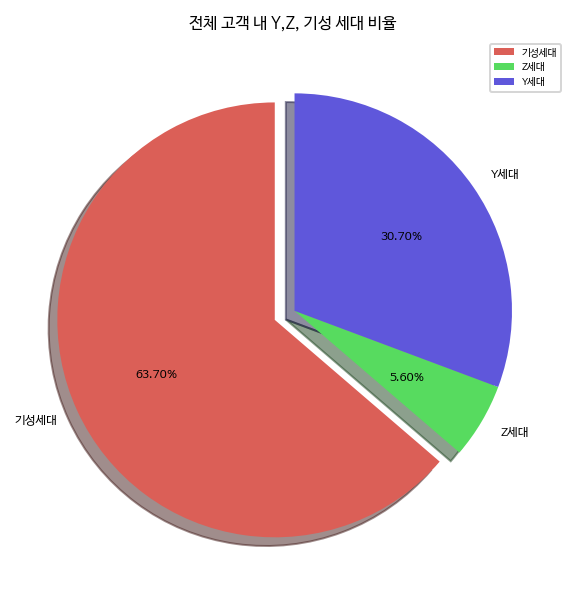

In [57]:
#y,z,기성세대 파이차트 만든 코드


labels = ['기성세대','Z세대','Y세대',]
ratio = [len(cus_info_else)/10000,len(cus_info_z)/10000,len(cus_info_y)/10000]
group_explodes = (0.1,0,0)
fig = plt.figure(figsize = (5,5))

fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(ratio,
        labels = labels,
        explode = group_explodes,
        startangle = 90,
        autopct = lambda p:'{:.2f}%'.format(p),
        colors = sns.color_palette('hls',len(labels)),
        textprops = {'fontsize':6},
        shadow = True)
plt.legend(pie[0],labels)
plt.title('전체 고객 내 Y,Z, 기성 세대 비율 ',fontsize = 8)

미국의 세대분류에 따르면 Z세대는 1 ~ 24세, Y세대는 25 ~ 40세로 분류되지만 데이터 구조상 Y세대를 25 ~ 39세로 정의하였고 이외 세대는 기성세대라고 정의했습니다. 데이터를 바탕으로 전체 고객의 비율은 Y세대 30.7%, Z세대 5.6% 그 외 기성세대 63.7%로 이루어져 있습니다.

**2. When Y, Z세대 언제부터 주식을 시작했는가?**

그렇다면 이러한 Y, Z세대는 처음부터 이러한 고객비중을 차지하고 있었을까요? 이번 2020년 주식시장에서 주목해야할 점은 Y, Z세대가 코로나로 인한 폭락 이후 대거 유입이 되었다는 점입니다. 

**거래일을 기준으로 코로나 이전/이후 진입 나누기**
- 2020/02/24 일 기준 코로나발 악제로 인해 -3.87% 급락
- 2020/02/28 일 기준 코스피 2000 붕괴(1987.01) -3.30% 급락
- 2020/03/19 일 기준 kospi 1400

2월 말 기준으로 거래가 있었던 사람들(거래 2건 이상)을 기존 고객, 3월 부터 거래가 있는 사람을 신규고객으로 정의했습니다.

*코로나 이후로 기존고객에 비해 Y,Z의 총 고객 수는 약 2배로 늘어났다는 것을 알 수 있습니다.*

3. Where Y, Z세대는 어느 시장에 투자할까?

Text(0.5, 1.0, '기존회원 3월 이전 거래량 비율')

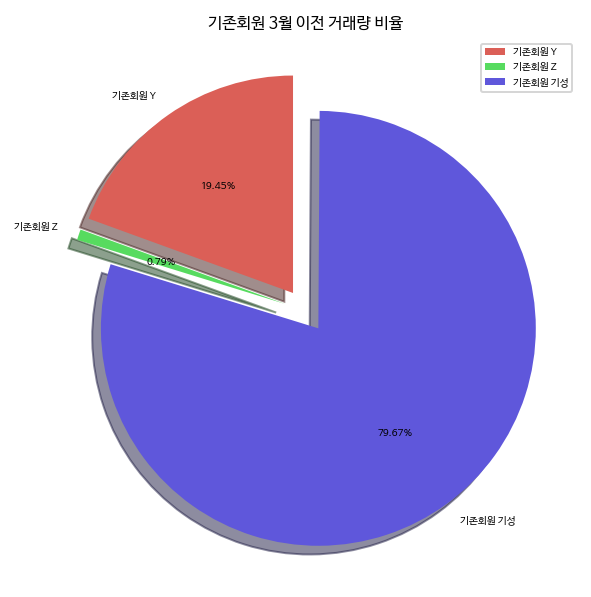

In [59]:
# 3월 이전 거래량 비율
labels = ['기존회원 Y', '기존회원 Z', '기존회원 기성']
pre_b4_march_y = (all_trd_kr['회원유입'] == '기존회원') & (all_trd_kr['세대'] == 'Y') & (all_trd_kr['주문날짜'] < '2020-03-01')
pre_b4_march_z = (all_trd_kr['회원유입'] == '기존회원') & (all_trd_kr['세대'] == 'Z') & (all_trd_kr['주문날짜'] < '2020-03-01')
pre_b4_march_else = (all_trd_kr['회원유입'] == '기존회원') & (all_trd_kr['세대'] == '기성') & (all_trd_kr['주문날짜'] < '2020-03-01')

ratio = [all_trd_kr[pre_b4_march_y]['거래금액'].sum() / all_trd_kr.거래금액[all_trd_kr['주문날짜'] < '2020-03-01'].sum(), 
         all_trd_kr[pre_b4_march_z]['거래금액'].sum() / all_trd_kr.거래금액[all_trd_kr['주문날짜'] < '2020-03-01'].sum(), 
         all_trd_kr[pre_b4_march_else]['거래금액'].sum() / all_trd_kr.거래금액[all_trd_kr['주문날짜'] < '2020-03-01'].sum()]


group_explodes = (0.1, 0.1, 0.1)
fig = plt.figure(figsize = (5, 5))

fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(ratio,
        labels = labels,
        explode = group_explodes,
        startangle = 90,
        autopct = lambda p:'{:.2f}%'.format(p),
        colors = sns.color_palette('hls',len(labels)),
        textprops = {'fontsize':5},
        shadow = True)

plt.legend(pie[0],labels)
plt.title('기존회원 3월 이전 거래량 비율',fontsize = 8)

Text(0.5, 1.0, 'YZ 3월 이후 거래량 비율')

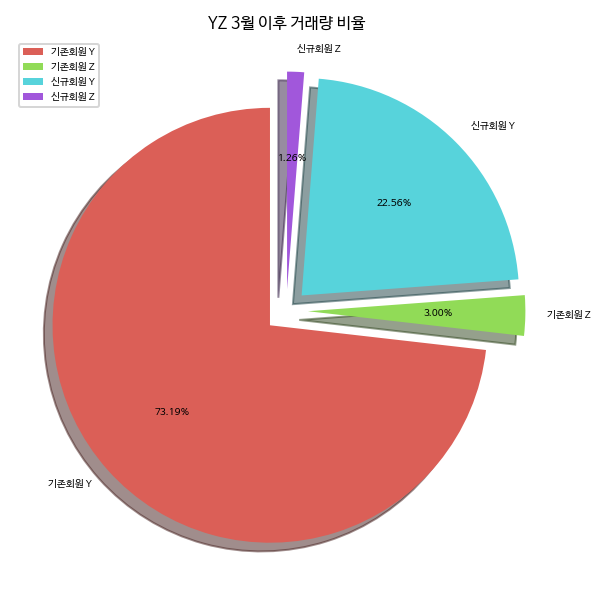

In [58]:
# 3월 이후 거래량 비율
labels = ['기존회원 Y', '기존회원 Z', '신규회원 Y', '신규회원 Z']
pre_trd_y = (yz_trd_kr['회원유입'] == '기존회원') & (yz_trd_kr['세대'] == 'Y') & (yz_trd_kr['주문날짜'] >= '2020-03-01')
pre_trd_z = (yz_trd_kr['회원유입'] == '기존회원') & (yz_trd_kr['세대'] == 'Z') & (yz_trd_kr['주문날짜'] >= '2020-03-01')

post_trd_y = (yz_trd_kr['회원유입'] == '신규회원') & (yz_trd_kr['세대'] == 'Y') & (yz_trd_kr['주문날짜'] >= '2020-03-01')
post_trd_z = (yz_trd_kr['회원유입'] == '신규회원') & (yz_trd_kr['세대'] == 'Z') & (yz_trd_kr['주문날짜'] >= '2020-03-01')

ratio = [yz_trd_kr[pre_trd_y]['거래금액'].sum() / yz_trd_kr.거래금액[yz_trd_kr['주문날짜'] >= '2020-03-01'].sum(), 
         yz_trd_kr[pre_trd_z]['거래금액'].sum() / yz_trd_kr.거래금액[yz_trd_kr['주문날짜'] >= '2020-03-01'].sum(), 
         yz_trd_kr[post_trd_y]['거래금액'].sum() / yz_trd_kr.거래금액[yz_trd_kr['주문날짜'] >= '2020-03-01'].sum(), 
         yz_trd_kr[post_trd_z]['거래금액'].sum() / yz_trd_kr.거래금액[yz_trd_kr['주문날짜'] >= '2020-03-01'].sum()]

group_explodes = (0.1, 0.1, 0.1, 0.1)
fig = plt.figure(figsize = (5 ,5))

fig.set_facecolor('white')
ax = fig.add_subplot()
pie = ax.pie(ratio,
        labels = labels,
        explode = group_explodes,
        startangle = 90,
        autopct = lambda p:'{:.2f}%'.format(p),
        colors = sns.color_palette('hls',len(labels)),
        textprops = {'fontsize':5},
        shadow = True)

plt.legend(pie[0],labels)
plt.title('YZ 3월 이후 거래량 비율',fontsize = 8)

In [ ]:
# 코스피, 코스닥 RATIO 그래프
fig = make_subplots(rows = 2, cols = 1, shared_xaxes=True, vertical_spacing=0.1, 
                    subplot_titles=['세대 간 kospi 비율', '세대 간 kosdaq 비율'],
                    x_title = 'Date', y_title = 'Ratio')

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == 'YZ')], 
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == 'YZ')], 
                         name = 'YZ', mode='lines'), row=1, col=1)

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == '기성')],
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == '기성')],
                         name = '기성', mode='lines'), row=1, col=1)

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kosdaq') & (merged_ratio['세대'] == 'YZ')], 
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kosdaq') & (merged_ratio['세대'] == 'YZ')], 
                         name = 'YZ', mode='lines'), row=2, col=1)

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kosdaq') & (merged_ratio['세대'] == '기성')], 
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kosdaq') & (merged_ratio['세대'] == '기성')],
                         name = '기성', mode='lines'), row=2, col=1)



fig.show()

In [ ]:
# KOSPI TIME SERIES
fig = make_subplots(rows = 2, cols = 1, shared_xaxes=True, vertical_spacing=0.15, 
                    subplot_titles=['세대 간 kospi 비율', 'kospi 변화'])

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == 'YZ')], 
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == 'YZ')],
                         name = 'YZ', mode='lines'), row=1, col=1)

fig.add_trace(go.Scatter(x=merged_ratio.주문날짜[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == '기성')], 
                         y=merged_ratio.비율[(merged_ratio['시장구분'] == 'kospi') & (merged_ratio['세대'] == '기성')],
                         name = '기성', mode='lines'), row=1, col=1)

kospi_history['MA3'] = kospi_history['Price'].rolling(3).mean()
kospi_history['MA7'] = kospi_history['Price'].rolling(7).mean()
kospi_history['MA30'] = kospi_history['Price'].rolling(30).mean()
kospi_history['MA60'] = kospi_history['Price'].rolling(60).mean()

fig.add_trace(go.Candlestick(x=kospi_history['Date'], open=kospi_history['Open'], high=kospi_history['High'], 
                       low=kospi_history['Low'], close=kospi_history['Price'], name='kospi'), row=2, col=1)

# 이동평균선 추가 
fig.add_trace(go.Scatter(x=kospi_history['Date'], y=kospi_history['MA3'], mode='lines', name='MA3'), row=2, col=1)
fig.add_trace(go.Scatter(x=kospi_history['Date'], y=kospi_history['MA7'], mode='lines', name='MA7'), row=2, col=1)
fig.add_trace(go.Scatter(x=kospi_history['Date'], y=kospi_history['MA30'], mode='lines', name='MA30'), row=2, col=1)
fig.add_trace(go.Scatter(x=kospi_history['Date'], y=kospi_history['MA60'], mode='lines', name='MA60'), row=2, col=1)

# 제목 추가
fig.update_layout(
    title_text="kospi time series"
)

# Range slider 추가
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.update_xaxes(rangeslider= {'visible':False}, row=1, col=1)

cs = fig.data[2]

# Set line and fill colors
cs.increasing.fillcolor = '#FF0000'
cs.increasing.line.color = '#FF0000'
cs.decreasing.fillcolor = '#0000FF'
cs.decreasing.line.color = '#0000FF'

initial_range = ["2020-03-01", "2020-06-30"]
fig['layout']['xaxis'].update(range=initial_range)

fig.show()


Y, Z세대의 주요 투자처를 살펴보기 위해 KOSPI와 KOSDAQ 내 기성세대와 Y,Z 세대의 점유율을 비교해봤습니다.

세대간 코스피 비율, 코스닥 비율이 기성세대 + Y, Z세대가 1이기 때문에 기성세대가 하락하는 경우 Y, Z세대가 상승합니다. 

하지만 여기서 중요하게 봐야할 것은 그 시기 입니다. 두 그래프가 만나는 지점인 19년 1월 25일, 3월 4일, 3월 25일, 6월 13일, 8월 8일, 12월 19일과 20년 1월 28일, 6월 16일 이후 지수가 하락하는 모습을 보였습니다.

따라서 기성세대가 비율을 줄이면 지수가 하락하고, 늘리면 상승하는 모습을 알 수 있습니다.

물론 전체의 63.7%인 기성세대가 매도 포지션을 잡는 경우 수요와 공급에 의해 지수가 하락할 수밖에 없지만 만나는 시점 이후 지수의 하락까지 실제로 1~2 거래일 차이가 있기 때문에 선제적인 조치를 취할 수 있을 것으로 보입니다.

***결론적으로 투자성적은 결국 Y, Z세대가 기성세대에 비해 뒤쳐진다는 것을 확인할 수 있습니다***

**4. What Y, Z세대는 어떤 주식을 샀을까?**

Y, Z세대는 어떤 주식을 주로 구매했을까요? 또 3월 이후 새롭게 진입한 고객들은 어떤 종목을 가장 많이 담았을까요? 
 
각 종목의 매수인원 비율을 통해 종목에 대한 관심도를 살펴보고, 종목별 총 매수금액을 살펴보겠습니다.

In [ ]:
# (전체종목시각화 포트폴리오 top30), #매수인원 데이터프레임 형성 함수
def buynumdata(trd):
  
  trd_df = trd[trd['매매구분코드']==2]
  dic = dict(Counter(trd.groupby(['종목한글명','고객번호']).sum().reset_index()['종목한글명']))
  id = dic.keys()
  count = dic.values()

  trd_buyer_df = pd.DataFrame({'종목한글명':id, '구매인원':count});
  trd_buyer_df = trd_buyer_df.sort_values(by='구매인원',ascending = False)
  
  trd_all_df = trd_df.groupby('종목한글명').sum()[['체결수량','거래금액','매매구분코드']].reset_index()
  trd_all_df = pd.merge(trd_all_df,trd_buyer_df,how = 'inner',on = '종목한글명')
  tot_num = len(trd['고객번호'].unique())
  
  trd_all_df['거래횟수(매수)'] = trd_all_df['매매구분코드'].map(lambda x: int(x/2))
  trd_all_df.drop('매매구분코드',axis = 1,inplace = True)
  trd_all_df['구매비율(%)'] = trd_all_df['구매인원'].map(lambda x : round(x/tot_num,4)*100)
  trd_all_df = (pd.merge(trd_all_df,iem_info_final))
  trd_all_df = trd_all_df.sort_values(by = '구매인원',ascending = False).drop('종목코드',axis = 1)
  return trd_all_df

#전체고객 매수데이터 top20, 3월이전 매수데이터 top20, 3월이후 매수데이터 top20
corp_bn_all = buynumdata(trd_kr_3)

data = corp_bn_all.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)
fig = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = '포트폴리오에 가장 많이 담은 종목 top20',width=1000, height=600)
fig.update_traces(marker = dict(size = 10))
fig.update_layout(font=dict(
        size=15,
        color="RebeccaPurple"),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


In [ ]:
trd_before_3 = trd_kr_3[trd_kr_3['주문날짜']<20200301]
trd_after_3 = trd_kr_3[trd_kr_3['주문날짜']>20200300]

corp_bn_all_after3 = buynumdata(trd_after_3);corp_bn_all_after3
corp_bn_all_before3 = buynumdata(trd_before_3);corp_bn_all_before3

data = corp_bn_all_before3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)
fig2 = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = '3월 1일 이전에 포트폴리오에 가장 많이 담은 종목 top20',width=1000, height=600)
fig2.update_traces(marker = dict(size = 10))
fig2.update_layout(font=dict(
        size=15,
        color="RebeccaPurple"),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

data = corp_bn_all_after3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)
fig3 = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = '3월 1일 이후에 포트폴리오에 가장 많이 담은 종목 top20',width=1300, height=600)
fig3.update_traces(marker = dict(size = 10))
fig3.update_layout(font=dict(
        size=15,
        color="RebeccaPurple"),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig2.show()
fig3.show()

*매수인원 비율은 종목에 대한 관심도로 해석을 할 수 있고*
*총 매수금액을 통해 시장을 주도하는 종목을 볼 수 있습니다.*

+ Z 세대 포트폴리오 비교

 


In [ ]:
#z세대 매수 + 매도데이터
trd_kr_z = pd.merge(trd_kr_2,acc_z,how = 'inner',on = '계좌번호')
trd_kr_z = trd_kr_z[['고객번호','계좌번호','종목코드','종목한글명','시장구분','종목구분','추종 배수','체결수량','체결가격','거래금액','주문날짜','매매구분코드','성별','연령대','고객등급','고객투자성향']];trd_kr_z


#3월이전, 이후 매수그래프 생성


trd_kr_z_after3 = trd_kr_z[trd_kr_z['주문날짜']>20200300]
z_most_buy_after3 = buynumdata(trd_kr_z_after3)
trd_kr_z_before3 = trd_kr_z[trd_kr_z['주문날짜']<20200301]
z_most_buy_before3 = buynumdata(trd_kr_z_before3)



data = z_most_buy_before3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)

fig = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = 'Z세대 중 3월 1일 이전에 포트폴리오에 가장 많이 담은 종목 top20',width=1000, height=600)
fig.update_traces(marker = dict(size = 10))
fig.update_layout(font=dict(
        size=15,
        color="RebeccaPurple"),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

data = z_most_buy_after3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)

fig2 = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = 'Z세대 중 3월 1일 이후에 포트폴리오에 가장 많이 담은 종목 top20',width=1300, height=600)
fig2.update_traces(marker = dict(size = 10))
fig2.update_layout(font=dict(
        size=15,
        color="RebeccaPurple"),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
fig2.show()


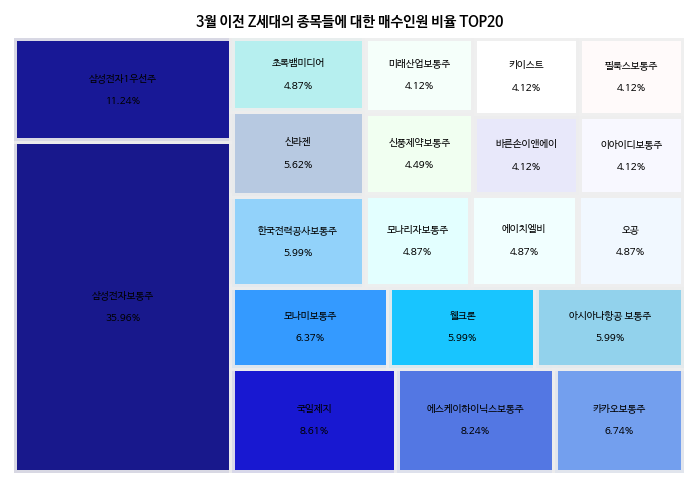

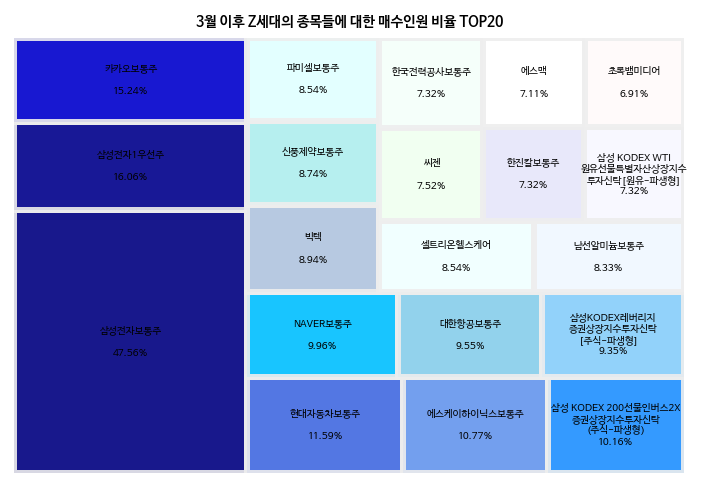

In [49]:
df =  z_most_buy_before3.head(20)
plt.figure(figsize = (6,4))
plt.rc('font', size=5)
labels = [name + '\n\n' + str(round(df.iloc[i,5],2))+'%' for i,name in enumerate(list(df.종목한글명))]
colors = ['navy','darkblue','mediumblue','royalblue','cornflowerblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightsteelblue','paleturquoise','lightcyan','azure','aliceblue','honeydew','mintcream','lavender','ghostwhite','white','snow',]

plt.title('3월 이전 Z세대의 종목들에 대한 매수인원 비율 TOP20',fontsize=7,fontweight="bold")
tree.plot(df['구매비율(%)'],alpha = .9,color = colors,label=labels,bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
plt.axis('off')
plt.show()


df2 =  z_most_buy_after3.head(20)
plt.figure(figsize = (6,4))
plt.rc('font', size=5)
labels = [name + '\n\n' + str(round(df2.iloc[i,5],2))+'%' for i,name in enumerate(list(df2.종목한글명))]
colors = ['navy','darkblue','mediumblue','royalblue','cornflowerblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightsteelblue','paleturquoise','lightcyan','azure','aliceblue','honeydew','mintcream','lavender','ghostwhite','white','snow',]
labels[5] = '삼성 KODEX 200선물인버스2X' +'\n' +'증권상장지수투자신탁'+'\n'+'(주식-파생형)'+'\n' +str(round(df2.iloc[5,5],2))+'%'
labels[8] = '삼성KODEX레버리지' +'\n' +'증권상장지수투자신탁'+'\n'+'[주식-파생형]	'+'\n' +str(round(df2.iloc[8,5],2))+'%'
labels[17] = '삼성 KODEX WTI' +'\n' +'원유선물특별자산상장지수'+'\n'+'투자신탁[원유-파생형]'+'\n' +str(round(df2.iloc[17,5],2))+'%'
plt.title('3월 이후 Z세대의 종목들에 대한 매수인원 비율 TOP20',fontsize=7,fontweight="bold")
tree.plot(df2['구매비율(%)'],alpha = .9,color = colors,label=labels,bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
plt.axis('off')
plt.show()



3월 이전의 Z세대 매수인원 비율 TOP 10 중 삼성전자, 삼성전자 우선주, 에스케이하이닉스를 제외한 7개의 종목이 당시 테마주로 분류되었습니다

3월 이후의 Z세대 매수인원 비율 TOP 10에는 빅텍, 대한항공의 테마주를 제외하고 지수 ETF를 포함한 8개 종목이 대형주로 평가가 됩니다.

이처럼 3월 이전의 Z 세대의 경우 공격적 투자경향을 보이는 반면, 3월 이후 Z세대 투자자들은 안정형 투자경향을 보입니다.

>테마주 : 주식시장에 상장된 주식으로서, 하나의 주제를 가진 사건에 의해 같은 방향으로 주가가 움직이는 종목군을 말한다.

>대형주 : 대형주는 시가총액이 상대적으로 큰 주식을 말한다.


+ Y 세대 포트폴리오 비교



In [ ]:
# (3월 이전 이후 거래 데이터 비교)#y세대 거래+고객+종목 데이터
trd_kr_y = pd.merge(trd_kr_2,acc_y,how = 'inner',on = '계좌번호')
trd_kr_y = trd_kr_y[['고객번호','계좌번호','종목코드','종목한글명','시장구분','종목구분','추종 배수','체결수량','체결가격','거래금액','주문날짜','매매구분코드','성별','연령대','고객등급','고객투자성향']];

trd_kr_y_after3 = trd_kr_y[trd_kr_y['주문날짜']>20200300]
y_most_buy_after3 = buynumdata(trd_kr_y_after3)
trd_kr_y_before3 = trd_kr_y[trd_kr_y['주문날짜']<20200301]
y_most_buy_before3 = buynumdata(trd_kr_y_before3)



data = y_most_buy_before3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)

fig = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = 'Y세대 중 3월 1일 이전에 포트폴리오에 가장 많이 담은 종목 top20',width=1025, height=600)
fig.update_traces(marker = dict(size = 10))
fig.update_layout(font=dict(
        size=15,),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

data = y_most_buy_after3.sort_values(by = '구매인원',ascending = False).rename(columns = {'거래금액':'총매수금액','종목한글명':'종목명'}).head(20)

fig2 = px.scatter(data_frame=data, x='총매수금액', y='구매인원', color='종목명', hover_name='종목명',title = 'Y세대 중 3월 1일 이후에 포트폴리오에 가장 많이 담은 종목 top20',width=1300, height=600)
fig2.update_traces(marker = dict(size = 10))
fig2.update_layout(font=dict(
        size=15,),
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
fig2.show()



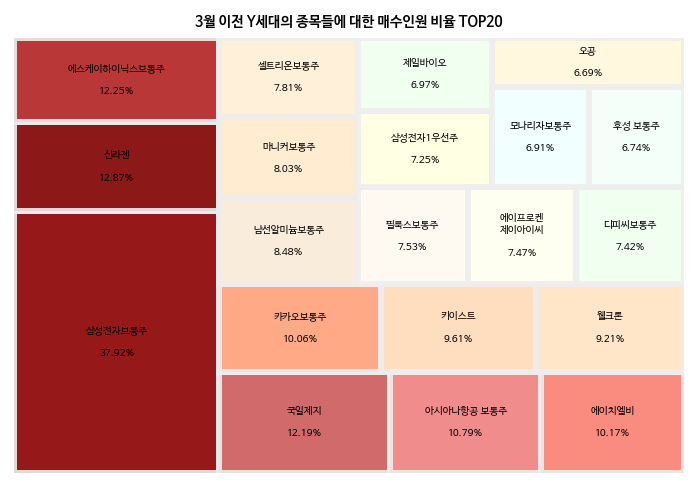

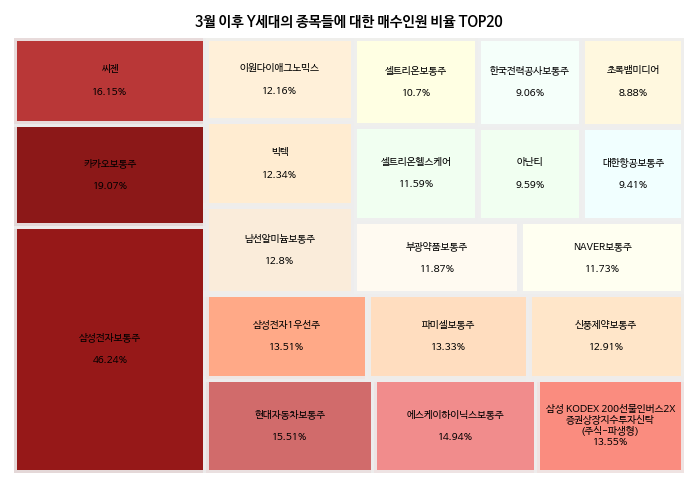

In [47]:
df =  y_most_buy_before3.head(20)
plt.figure(figsize = (6,4))
plt.rc('font', size=5)
labels = [name + '\n\n' + str(round(df.iloc[i,5],2))+'%' for i,name in enumerate(list(df.종목한글명))]
colors = ['darkred','maroon','firebrick','indianred','lightcoral','salmon','lightsalmon','peachpuff','bisque','antiquewhite','blanchedalmond','papayawhip','floralwhite','ivory','honeydew','lightyellow','honeydew','azure','mintcream','cornsilk']
labels[-7] = '에이프로켄'+'\n'+'제이아이씨'+'\n\n'+str(round(df.iloc[-7,5],2))+'%'
plt.title('3월 이전 Y세대의 종목들에 대한 매수인원 비율 TOP20',fontsize=7,fontweight="bold")
tree.plot(df['구매비율(%)'].head(20),alpha = .9,color = colors,label=labels,bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
plt.axis('off')
plt.show()


df2 =  y_most_buy_after3.head(20)
plt.figure(figsize = (6,4))
plt.rc('font', size=5)
labels = [name + '\n\n' + str(round(df2.iloc[i,5],2))+'%' for i,name in enumerate(list(df2.종목한글명))]
colors = ['darkred','maroon','firebrick','indianred','lightcoral','salmon','lightsalmon','peachpuff','bisque','antiquewhite','blanchedalmond','papayawhip','floralwhite','ivory','honeydew','lightyellow','honeydew','azure','mintcream','cornsilk']
labels[5] = '삼성 KODEX 200선물인버스2X' +'\n' +'증권상장지수투자신탁'+'\n'+'(주식-파생형)'+'\n' +str(round(df2.iloc[5,5],2))+'%'
plt.title('3월 이후 Y세대의 종목들에 대한 매수인원 비율 TOP20',fontsize=7,fontweight="bold")
tree.plot(df2['구매비율(%)'].head(20),alpha = .9,color = colors,label=labels,bar_kwargs=dict(linewidth=3, edgecolor="#eee"))
plt.axis('off')
plt.show()

3월 이전의 Y세대 매수인원 비율 TOP10에는 삼성전자, 에스케이하이닉스, 카카오를 제외한 7개의 종목이 당시 테마주로 분류되었습니다

3월 이후의 Y세대 매수인원 비율 TOP10에는 삼성전자, 카카오, 현대차, 에스케이하이닉스, 삼성전자우선주, 지수 ETF로 대형주 매수가 늘었습니다.



**투자성향별 포트폴리오 비교**


Z세대와 Y세대의 투자성향별 포트폴리오를 비교해보았습니다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



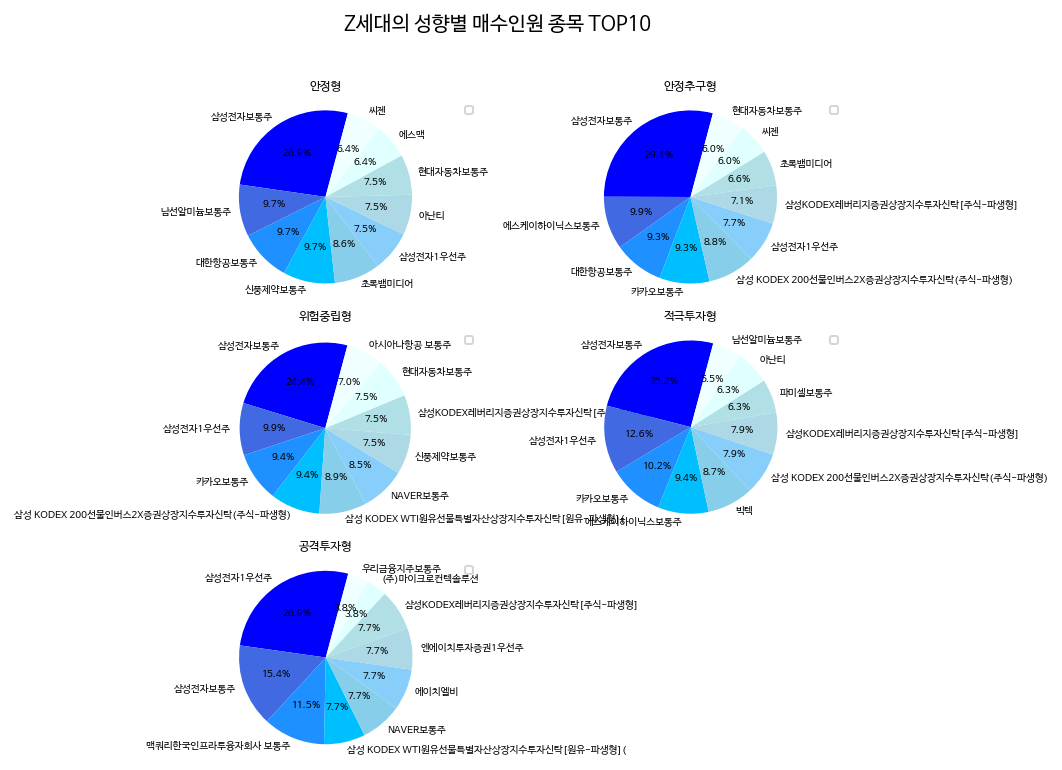

In [61]:
#z세대 종목별 매수인원 df 생성함수
def buyer_num(trd_kr_buy,tend):
  
  z = trd_kr_buy.groupby(['고객투자성향','종목한글명','고객번호']).sum().reset_index()
  dic = dict(Counter(z[z['고객투자성향']==tend]['종목한글명']))
  id = dic.keys()
  count = dic.values()

  trd_kr_buyer_num = pd.DataFrame({'종목한글명':id,'구매인원':count})
  trd_kr_buyer_num = trd_kr_buyer_num.sort_values(by = '구매인원',ascending = False)

  df = trd_kr_buy.groupby(['고객투자성향','종목한글명']).sum()[['체결수량','거래금액','매매구분코드']]

  tot_z= len(z[z['고객투자성향']==tend]['고객번호'].unique())

  df= pd.merge(df.loc[tend].reset_index(),trd_kr_buyer_num)

  df['거래횟수(매수)'] = df['매매구분코드'].map(lambda x: int(x/2))
  df['구매비율(%)'] = df['구매인원'].map(lambda x : round(x/tot_z,4)*100)
  df = df.sort_values(by = '구매비율(%)',ascending = False)
  df = pd.merge(df,iem_info_final,how = 'inner',on = '종목한글명')
  df.drop(['매매구분코드','종목영문명'],axis = 1,inplace =True)
  
  return df


#z세대 매수데이터
trd_kr_z_buy = trd_kr_z[trd_kr_z['매매구분코드']==2].reset_index().drop('index',axis = 1)




#z세대의 성향별 매수데이터
trd_z_tend01 = buyer_num(trd_kr_z_buy,'01')
trd_z_tend02 = buyer_num(trd_kr_z_buy,'02')
trd_z_tend03 = buyer_num(trd_kr_z_buy,'03')
trd_z_tend04 = buyer_num(trd_kr_z_buy,'04')
trd_z_tend05 = buyer_num(trd_kr_z_buy,'05')
trd_z_no_tend = buyer_num(trd_kr_z_buy,'-')



#파이차트 생성
z_tend_list = [trd_z_tend01.head(10),trd_z_tend02.head(10),trd_z_tend03.head(10),trd_z_tend04.head(10),trd_z_tend05.head(10)]
tend = ['안정형','안정추구형','위험중립형','적극투자형','공격투자형']
colors = ['blue','royalblue','dodgerblue','deepskyblue','skyblue','lightskyblue','lightblue','powderblue','lightcyan','azure']




fig = plt.figure(figsize = (5,5))
fig.suptitle('Z세대의 성향별 매수인원 종목 TOP10',fontsize = 10)
plt.rc('font', size=4)
for i in range(5):
    ax = fig.add_subplot(321 + i)
    ax.set_title(tend[i])
    labels = z_tend_list[i]['종목한글명'].tolist()
    ax.legend(labels)
    sizes = [z_tend_list[i]['구매비율(%)']]
    ax.pie(sizes,labels = z_tend_list[i]['종목한글명'].tolist(),colors = colors ,autopct = lambda p:'{:.1f}%'.format(p) ,startangle=75)
    ax.axis('equal')

plt.show()

Z세대의 경우 표본이 적어 일반화 하기에 어려움이 있습니다만 공통점을 살펴봤습니다.

Z세대는 안정형을 제외하고 모두 레버리지 상품을 포함하고 있습니다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



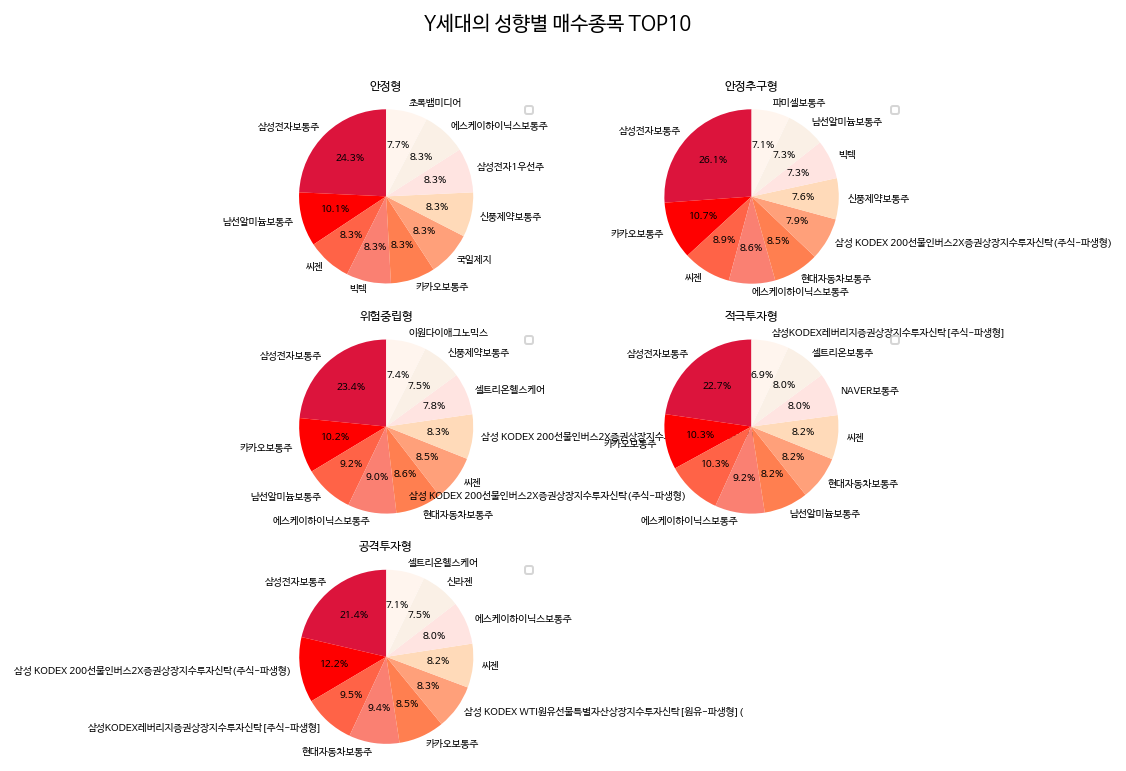

In [60]:
#거래데이터를 매수랑 매도로 나눈 것
trd_kr_y_buy = trd_kr_y[trd_kr_y['매매구분코드']==2]



#y세대 성향별 매수데이터
trd_y_tend01 = buyer_num(trd_kr_y_buy,'01')
trd_y_tend02= buyer_num(trd_kr_y_buy,'02')
trd_y_tend03= buyer_num(trd_kr_y_buy,'03')
trd_y_tend04= buyer_num(trd_kr_y_buy,'04')
trd_y_tend05= buyer_num(trd_kr_y_buy,'05')
trd_y_notend= buyer_num(trd_kr_y_buy,'-') 

#y세대 파이차트 생성
y_tend_list = [trd_y_tend01.head(10),trd_y_tend02.head(10),trd_y_tend03.head(10),trd_y_tend04.head(10),trd_y_tend05.head(10)]
tend = ['안정형','안정추구형','위험중립형','적극투자형','공격투자형']
colors = ['crimson','red','tomato','salmon','coral','lightsalmon','peachpuff','mistyrose','linen','seashell']
group_explodes = (0.1,0)


fig = plt.figure(figsize = (5,5))
fig.suptitle('Y세대의 성향별 매수종목 TOP10',fontsize = 10)
plt.rc('font', size=4)
for i in range(5):
    ax = fig.add_subplot(321 + i)
    ax.set_title(tend[i])
    labels = y_tend_list[i]['종목한글명'].tolist()
    ax.legend(labels)
    sizes = [y_tend_list[i]['구매비율(%)']]
    ax.pie(sizes,labels = y_tend_list[i]['종목한글명'].tolist(),colors = colors ,autopct = lambda p:'{:.1f}%'.format(p) ,startangle=90)
    ax.axis('equal')

plt.show()

Y세대의 5개 유형의 성향 모두 공통적으로 삼성전자, 씨젠, 하이닉스를 포함하고 있습니다.
 
안정형을 제외하고 모두 레버리지 상품과 현대차를 포함하고 있습니다.

공격투자형을 제외하면 모두 남선알미늄을 포함하고있는 공통점이 있습니다.

이렇듯 Y세대의 포트폴리오는 투자성향과 관계없이 유사한 종목을 포함하고 있는 점을 확인할 수 있습니다.



**5. Why Y,Z 세대의 투자 공통점은?**


앞서 살펴본 투자성향 비교 그래프를 보았을 때 투자성향에 따른 포트폴리오에 큰 차이가 없는 것을 살펴볼 수 있었습니다. 투자를 투자성향 이외의 요소들이 투자에 영향을 미친다고 생각했습니다.

Y,Z세대의 포트폴리오에 성향에 관계없이 테마주 종목들이 들어있었기 때문에 구글트랜드 검색을 통해 테마주, 관련주 검색량과 실제 거래금액의 차이가 있는지 살펴보기로 했습니다.

In [ ]:
#(트렌드 검색과 거래량 비교 그래프) 
fig = go.Figure()

fig.add_trace(go.Scatter(x=trend_df.Date, y=trend_df.관련주, name = '관련주', mode='lines'))
fig.add_trace(go.Scatter(x=trend_df.Date, y=trend_df.테마주, name = '테마주', mode='lines'))
fig.add_trace(go.Bar(x=new_y_trd_kr.index, y=new_y_trd_kr.거래금액, name = 'Y 세대 거래금액', opacity=0.3, yaxis='y3'))
fig.add_trace(go.Bar(x=new_z_trd_kr.index, y=new_z_trd_kr.거래금액, name = 'Z 세대 거래금액', opacity=0.3, yaxis='y4'))


# Create axis objects
fig.update_layout(
    yaxis3=dict(
        title="<b>Y 세대</b> 거래량",
        titlefont=dict(
            color="#A9DFBF"
        ),
        tickfont=dict(
            color="#A9DFBF"
        ),
        anchor="x",
        overlaying="y",
        side="left"
    ),
    yaxis4=dict(
        title="<b>Z 세대</b> 거래량",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="x",
        overlaying="y",
        side="right",
    )
)

fig.update_layout(yaxis={'visible': False, 'showticklabels': False})
fig.update_layout(yaxis2={'visible': False, 'showticklabels': False})

# X-axis 제목
fig.update_xaxes(title_text="Date")

fig.show()

구글 트렌드 검색어 ‘관련주’와 ‘테마주’와 실제 Y, Z 세대의 거래금액 추이가 2020년 3월부터 유사한 상승과 하방을 반복하는 모습을 살펴볼 수 있었습니다.

주식을 사는데는 다양한 이유가 있겠지만, 테마주와 관련주 등 그 당시 이슈가 되는 주식에 Y, Z세대가 민감하게 반응하는 이유 중 하나를 저희는 Y,Z세대가 시장전체의 인기나 다른 투자자의 매매에 편승하는 경향이 있다고 생각했습니다.


**결론**

고객들이 생각하는 투자성향은 다양하지만 고객들의 포트폴리오가 투자성향과는 관계없이 비슷한 양상을 보이는 것으로 보아, 스스로 어떤 투자자인지에 대한 인식과 주식투자 방법에 대한 이해가 부족하다는 것을 알 수 있었습니다. Y, Z세대는 3월 1일 이후 대거 주식시장에 유입되었기 때문에 체계적인 투자 방식보다는 뇌동매매 방식의 매매법을 하고 있다고 생각합니다.
 
>뇌동매매  : 투자자 자신이 확실한 예측을 갖지 못하고 시장전체의 인기나 다른 투자자의 움직임에 편승하여 매매에 나서는 것

 Y, Z세대는 구글 트렌드 검색어 ‘관련주’, ‘테마주’와 Y, Z 세대의 거래량 추이가 유사하게 움직이고 있는 만큼 테마, 관련주 위주의 주식투자를 진행하고 있고, 실제로 포트폴리오 내 종목들을 살펴봐도 투자성향에 관계없이 테마주가 주를 이루고 있습니다.

따라서 새로 주식시장에 들어온 Y, Z세대가 앞으로 자신이 원하는 투자성향에 걸맞는 투자방법을 익히기 위해 고객의 투자성향에 따라 맞춤 교육이 필요하다고 생각합니다. 현재 개설된 NH투자증권의 유튜브 채널과 같은 플랫폼을 활용하여 고객 교육을 진행할 필요가 있습니다.


**외부데이터**

KOSPI Historical Data.csv : 코스피 지수 변동 (출처 : Investing.com)

KODAQ Historical Data.csv : 코스닥 지수 변동 (출처 : Investing.com)

코스피.xlsx : 코스피 상장 법인목록 (출처 : 한국거래소)

코스닥.xlsx : 코스닥 상장 법인목록 (출처 : 한국거래소)